**Clasificación básica : Predecir una imagen de moda**

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
print(tf.__version__)

2.3.0


**Importar el dataset de fashion MNIST**

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

In [ ]:
(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()
print(train_images)

4423680/4422102 [==============================] - 0s 0us/step
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [ ]:
print(train_labels)

[9 0 0 ... 3 0 5]


In [ ]:
print(test_images.shape)

(10000, 28, 28)


In [ ]:
print(test_labels)

[9 2 1 ... 8 1 5]


In [ ]:
class_names = ['T-shirt/top', 'Trouser','Pullover','Dress','Coat','Sandal','Shirt','Skirt','Bag','Ankle boot']

**Preproceso**

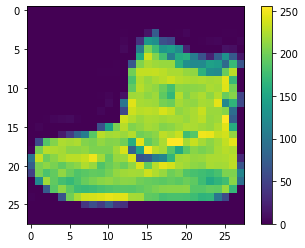

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
train_images = train_images/255.0
test_images = test_images/255.0

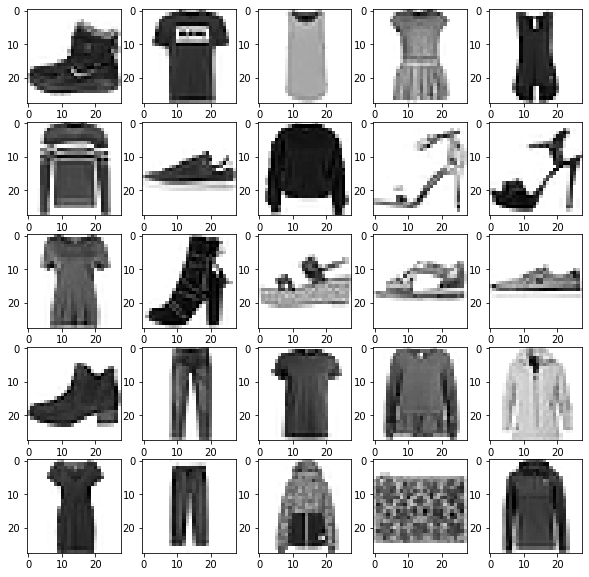

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.grid(False)
  plt.imshow(train_images[i],cmap=plt.cm.binary)
  #plt.xlabel(str(class_names(train_labels[i])))
plt.show()

**Configurar las capas**

In [ ]:
model= keras.Sequential([
  keras.layers.Flatten(input_shape=(28,28)), # primera capa que transforma el arreglo bidimensional en unidimensional en valores [0,1]
  keras.layers.Dense(128, activation='relu'), # 128 neuronas de la primera capa
  keras.layers.Dense(10, activation='softmax') # 10 tipos de datos, cada uno tendra una clasificacion
 ])

**Compilacion de nuestro modelo**

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

**Entrenar nuestro modelo**

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4251 - accuracy: 0.8507
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4185 - accuracy: 0.8525
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4131 - accuracy: 0.8540
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4077 - accuracy: 0.8561
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4030 - accuracy: 0.8586
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3984 - accuracy: 0.8595
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3937 - accuracy: 0.8610
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3904 - accuracy: 0.8622
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3863 - accuracy: 0.8636
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.382

**Evaluar la exactitud**

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('Test accuracy:',test_acc)

313/313 - 0s - loss: 88.5788 - accuracy: 0.7175
Test accuracy: 0.7174999713897705


**Hacer una predicción**

In [ ]:
predictions = model.predict(test_images)
predictions[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [ ]:
test_labels[0]

9

In [ ]:
def plot_image(i, predictions_array, true_label, img): 
  predictions_array, true_label, img = predictions_array, true_label[i], img[i] plt.grid(False) plt.xticks([])
  plt.yticks([]) plt.imshow(img, cmap=plt.cm.binary) predicted_label = np.argmax(predictions_array) 
  if predicted_label == true_label: 
    color = 'blue' 
  else: color = 'red' 
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label], 100*np.max(predictions_array), class_names[true_label]), color=color) 
  
def plot_value_array(i, predictions_array, true_label): 
  plt.grid(False) 
  plt.xticks(range(10)) plt.yticks([]) 
  thisplot = plt.bar(range(10), predictions_array, color="#777777") plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array) 
  thisplot[predicted_label].set_color('red') 
  thisplot[true_label].set_color('blue') 
  thisplot[true_label].set_color('blue') 
  i = 0 plt.figure(figsize=(6,3)) 
  plt.subplot(1,2,1) 
  plot_image(i, predictions[i], test_labels, test_images) 
  plt.subplot(1,2,2) plot_value_array(i, predictions[i], test_labels) 
  plt.show() 
